<center> <h1 style="background-color:seagreen; color:white" >Apriori Association Rules</h1> 

<center><img
src="https://media-exp1.licdn.com/dms/image/C4D12AQESnIfDsWzHgw/article-cover_image-shrink_600_2000/0?e=1603929600&v=beta&t=QFUbJY8HYJi2KYoxlEur1w5M5NPaU2h-S0OBlPKA8mo" style="width:70%;height:40%;">
</center>
    
<br>    
    
<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" style="background-color:seagreen; color:white" data-toggle="list"  role="tab" aria-controls="home">Notebook Content!</h3>  
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#libraries" role="tab" aria-controls="profile" style="color:forestgreen">Import Libraries<span class="badge badge-primary badge-pill" style="background-color:khaki; color:gray">1</span></a>
  <a id="section2" class="list-group-item list-group-item-action" data-toggle="list" href="#load" role="tab" aria-controls="messages" style="color:forestgreen">Load Data<span class="badge badge-primary badge-pill" style="background-color:khaki; color:gray">2</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#tidydata" role="tab" aria-controls="settings" style="color:forestgreen">Tidy Data for Association Rules<span class="badge badge-primary badge-pill" style="background-color:khaki; color:gray">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#step" role="tab" aria-controls="settings" style="color:forestgreen">Step by Step<span class="badge badge-primary badge-pill" style="background-color:khaki; color:gray">4</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#myfunction" role="tab" aria-controls="settings" style="color:forestgreen">My Function<span class="badge badge-primary badge-pill" style="background-color:khaki; color:gray">5</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#ar" role="tab" aria-controls="settings" style="color:forestgreen"> Association Rules<span class="badge badge-primary badge-pill" style="background-color:khaki; color:gray">6</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#notebooks" role="tab" aria-controls="settings" style="color:forestgreen">My Notebooks<span class="badge badge-primary badge-pill" style="background-color:khaki; color:gray">7</span></a> 
        <a class="list-group-item list-group-item-action" data-toggle="list" href="#ref" role="tab" aria-controls="settings" style="color:forestgreen">References<span class="badge badge-primary badge-pill" style="background-color:khaki; color:gray">8</span></a> 

<a id='libraries'></a>
<h1 style="color:forestgreen" >Association Rules? What's that!</h1> 

Association rule learning is a rule-based machine learning method for discovering interesting relations between variables in large databases. It is intended to identify strong rules discovered in databases using some measures of interestingness.

Based on the concept of strong rules, Rakesh Agrawal, Tomasz Imieliński and Arun Swam introduced association rules for discovering regularities between products in large-scale transaction data recorded by point-of-sale (POS) systems in supermarkets. For example, the rule {onions,potatoes} ->{burger} found in the sales data of a supermarket would indicate that if a customer buys onions and potatoes together, they are likely to also buy hamburger meat. Such information can be used as the basis for decisions about marketing activities such as, e.g., promotional pricing or product placements.

In addition to the above example from market basket analysis association rules are employed today in many application areas including Web usage mining, intrusion detection, continuous production, and bioinformatics. In contrast with sequence mining, association rule learning typically does not consider the order of items either within a transaction or across transactions. [Wikipedia] 

First of all, we need to know some terms about Association Rules.

- **Support:** Support is an indication of how frequently the itemset appears in the dataset.

Support is a so-called frequency constraint. Its main feature is that it possesses the property of down-ward closure which means that all sub sets of a frequent set (support > min. support threshold) are also frequent. This property (actually, the fact that no super set of a infrequent set can be frequent) is used to prune the search space (usually a tree of item sets with increasing size) in level-wise algorithms (e.g., the APRIORI algorithm). The disadvantage of support is the rare item problem. Items that occur very infrequently in the data set are pruned although they would still produce interesting and potentially valuable rules.

- **Confidence:** Confidence is an indication of how often the rule has been found to be true.

Confidence is not down-ward closed and was developed together with support (the so-called support-confidence framework). While support is used to prune the search space and only leave potentially interesting rules, confidence is used in a second step to filter rules that exceed a min. confidence threshold. A problem with confidence is that it is sensitive to the frequency of the consequent (Y) in the data set. Caused by the way confidence is calculated, Ys with higher support will automatically produce higher confidence values even if they exists no association between the items.

- **Lift:**  The ratio of the observed support to that expected if X and Y were independent.

Leverage measures the difference of X and Y appearing together in the data set and what would be expected if X and Y where statistically dependent. The rational in a sales setting is to find out how many more units (items X and Y together) are sold than expected from the independent sells. Using min. leverage thresholds at the same time incorporates an implicit frequency constraint. E.g., for setting a min. leverage thresholds to 0.01% (corresponds to 10 occurrence in a data set with 100,000 transactions) one first can use an algorithm to find all itemsets with min. support of 0.01% and then filter the found item sets using the leverage constraint. Because of this property leverage also can suffer from the rare item problem.

- **Conviction:** The ratio of the expected frequency that X occurs without Y (that is to say, the frequency that the rule makes an incorrect prediction) if X and Y were independent divided by the observed frequency of incorrect predictions.

Conviction compares the probability that X appears without Y if they were dependent with the actual frequency of the appearance of X without Y. In that respect it is similar to lift (see section about lift on this page), however, it contrast to lift it is a directed measure. Furthermore, conviction is monotone in confidence and lift.

- **Leverage:** Leverage measures the difference of X and Y appearing together in the data set and what would be expected if X and Y where statistically dependent.

The rational in a sales setting is to find out how many more units (items X and Y together) are sold than expected from the independent sells. Using min. leverage thresholds at the same time incorporates an implicit frequency constraint. E.g., for setting a min. leverage thresholds to 0.01% (corresponds to 10 occurrence in a data set with 100,000 transactions) one first can use an algorithm to find all itemsets with min. support of 0.01% and then filter the found item sets using the leverage constraint. Because of this property leverage also can suffer from the rare item problem. [Michael Hahsler]




<a id='libraries'></a>
<h1 style="color:forestgreen" >1. Packages</h1> 

In [1]:
# ----------------------------
# BASE
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# ----------------------------
# INSTALL
# !pip install mlxtend

# ----------------------------
# TRANSACTION ENCODER
from mlxtend.preprocessing import TransactionEncoder

# ----------------------------
# APRIORI FUNCTION 
from mlxtend.frequent_patterns import apriori, association_rules

# ----------------------------
# ITERTOOLS 
import itertools

# ----------------------------
# CONFIGURATION
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

<a id='load'></a>
<h1 style="color:forestgreen" >2. Data</h1> 

In [2]:
df = pd.read_csv("GroceryStoreDataSet.csv",names=['products'],header=None)
df

,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"
5,"BREAD,TEA,BOURNVITA"
6,"MAGGI,TEA,CORNFLAKES"
7,"MAGGI,BREAD,TEA,BISCUIT"
8,"JAM,MAGGI,BREAD,TEA"
9,"BREAD,MILK"


In [3]:
df.shape

(20, 1)

<a id='tidydata'></a>
<h1 style="color:forestgreen" >3. Tidy Data for Association Rules</h1> 

In [4]:
data = list(df["products"].apply(lambda x:x.split(',')))

from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit(data).transform(data)
df = pd.DataFrame(te_data,columns=te.columns_).astype(int)

df

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,1,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,1,1,0,0
4,1,0,0,0,0,0,0,1,0,0,1
5,0,1,1,0,0,0,0,0,0,0,1
6,0,0,0,0,0,1,0,1,0,0,1
7,1,0,1,0,0,0,0,1,0,0,1
8,0,0,1,0,0,0,1,1,0,0,1
9,0,0,1,0,0,0,0,0,1,0,0


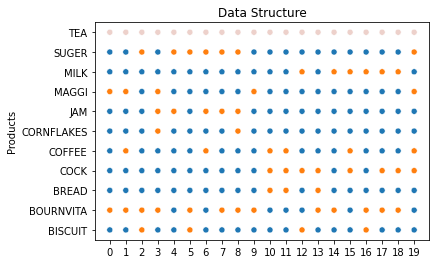

In [5]:
p = df.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Products')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(df.index)
    g.set_yticklabels(df.columns)
    plt.title("Data Structure")


<a id='step'></a>
<h1 style="color:forestgreen" >4. Step by Step</h1> 


**First Iteration:** Find support values for each product.

- n: 20 (df.shape[0])

In [6]:
# Find Frequency of Items
df.sum()

BISCUIT        7
BOURNVITA      4
BREAD         13
COCK           3
COFFEE         8
CORNFLAKES     6
JAM            2
MAGGI          5
MILK           5
SUGER          6
TEA            7
dtype: int64

If we divide all items with row number, we can find Support value. Our threshold value is 0.2 for Support value.

In [7]:
# Product Frequency / Total Sales
first = pd.DataFrame(df.sum() / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
BREAD,0.65
COFFEE,0.40
BISCUIT,0.35
TEA,0.35
CORNFLAKES,0.30
SUGER,0.30
MAGGI,0.25
MILK,0.25
BOURNVITA,0.20
COCK,0.15


In [8]:
# Elimination by Support Value
first[first.Support >= 0.15]

,Support
BREAD,0.65
COFFEE,0.40
BISCUIT,0.35
TEA,0.35
CORNFLAKES,0.30
SUGER,0.30
MAGGI,0.25
MILK,0.25
BOURNVITA,0.20
COCK,0.15


**Second Iteration:** Find support values for pair product combinations.

In [9]:
second = list(itertools.combinations(first.index, 2))
second = [list(i) for i in second]
# Sample of combinations
second[:10]

[['BREAD', 'COFFEE'],
 ['BREAD', 'BISCUIT'],
 ['BREAD', 'TEA'],
 ['BREAD', 'CORNFLAKES'],
 ['BREAD', 'SUGER'],
 ['BREAD', 'MAGGI'],
 ['BREAD', 'MILK'],
 ['BREAD', 'BOURNVITA'],
 ['BREAD', 'COCK'],
 ['BREAD', 'JAM']]

In [10]:
# Finding support values
value = []
for i in range(0, len(second)):
    temp = df.T.loc[second[i]].sum() 
    temp = len(temp[temp == df.T.loc[second[i]].shape[0]]) / df.shape[0]
    value.append(temp)
# Create a data frame            
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,
"(TEA, MAGGI)",0.20,2
"(BREAD, TEA)",0.20,2
"(BREAD, SUGER)",0.20,2
"(BREAD, MILK)",0.20,2
"(BREAD, BISCUIT)",0.20,2
"(COFFEE, CORNFLAKES)",0.20,2
"(COFFEE, SUGER)",0.20,2
"(BREAD, COFFEE)",0.15,2
"(BREAD, MAGGI)",0.15,2


<a id='myfunction'></a>
<h1 style="color:forestgreen" >5. My Function</h1> 

mlxtend package helps us to analyze association rules problems. In this content, I tried to create my own function for association rules.

In [11]:
def ar_iterations(data, num_iter = 1, support_value = 0.1, iterationIndex = None):
    
    # Next Iterations
    def ar_calculation(iterationIndex = iterationIndex): 
        # Calculation of support value
        value = []
        for i in range(0, len(iterationIndex)):
            result = data.T.loc[iterationIndex[i]].sum() 
            result = len(result[result == data.T.loc[iterationIndex[i]].shape[0]]) / data.shape[0]
            value.append(result)
        # Bind results
        result = pd.DataFrame(value, columns = ["Support"])
        result["index"] = [tuple(i) for i in iterationIndex]
        result['length'] = result['index'].apply(lambda x:len(x))
        result = result.set_index("index").sort_values("Support", ascending = False)
        # Elimination by Support Value
        result = result[result.Support > support_value]
        return result    
    
    # First Iteration
    first = pd.DataFrame(df.T.sum(axis = 1) / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
    first = first[first.Support > support_value]
    first["length"] = 1
    
    if num_iter == 1:
        res = first.copy()
        
    # Second Iteration
    elif num_iter == 2:
        
        second = list(itertools.combinations(first.index, 2))
        second = [list(i) for i in second]
        res = ar_calculation(second)
        
    # All Iterations > 2
    else:
        nth = list(itertools.combinations(set(list(itertools.chain(*iterationIndex))), num_iter))
        nth = [list(i) for i in nth]
        res = ar_calculation(nth)
    
    return res

In [12]:
iteration1 = ar_iterations(df, num_iter=1, support_value=0.1)
iteration1

,Support,length
BREAD,0.65,1
COFFEE,0.40,1
BISCUIT,0.35,1
TEA,0.35,1
CORNFLAKES,0.30,1
SUGER,0.30,1
MAGGI,0.25,1
MILK,0.25,1
BOURNVITA,0.20,1
COCK,0.15,1


In [13]:
iteration2 = ar_iterations(df, num_iter=2, support_value=0.1)
iteration2

,Support,length
index,,
"(COFFEE, CORNFLAKES)",0.20,2
"(BREAD, TEA)",0.20,2
"(TEA, MAGGI)",0.20,2
"(BREAD, SUGER)",0.20,2
"(BREAD, BISCUIT)",0.20,2
"(BREAD, MILK)",0.20,2
"(COFFEE, SUGER)",0.20,2
"(BREAD, COFFEE)",0.15,2
"(COFFEE, COCK)",0.15,2


In [14]:
iteration3 = ar_iterations(df, num_iter=3, support_value=0.01,
              iterationIndex=iteration2.index)
iteration3

,Support,length
index,,
"(BREAD, TEA, BOURNVITA)",0.10,3
"(TEA, BISCUIT, MAGGI)",0.10,3
"(BISCUIT, CORNFLAKES, COFFEE)",0.10,3
"(BREAD, MILK, BISCUIT)",0.10,3
"(BISCUIT, COCK, COFFEE)",0.10,3
"(BISCUIT, COCK, CORNFLAKES)",0.10,3
"(BREAD, SUGER, COFFEE)",0.10,3
"(BREAD, TEA, MAGGI)",0.10,3
"(COCK, CORNFLAKES, COFFEE)",0.10,3


In [15]:
iteration4 = ar_iterations(df, num_iter=4, support_value=0.01,
              iterationIndex=iteration3.index)
iteration4

,Support,length
index,,
"(CORNFLAKES, BISCUIT, COCK, COFFEE)",0.10,4
"(BREAD, TEA, BISCUIT, MAGGI)",0.05,4
"(TEA, CORNFLAKES, MILK, COFFEE)",0.05,4
"(BREAD, CORNFLAKES, MILK, BISCUIT)",0.05,4


<a id='ar'></a>
<h1 style="color:forestgreen" >6. Association Rules</h1> 

There are two main functions here. 
- apriori() function evaluate support value for each product.
- association_rules() function help us to understand relationship between antecedents and consequences products. It gives some remarkable information about products.

Especially, "antecedent support", "consequent support", "support", "confidence" and	"lift" variables are very important to make some business decisions.

In [16]:
# Apriori
freq_items = apriori(df, min_support = 0.1, use_colnames = True, verbose = 1)
freq_items.sort_values("support", ascending = False)

Processing 108 combinations | Sampling itemset size 4


,support,itemsets
2,0.65,(BREAD)
4,0.40,(COFFEE)
0,0.35,(BISCUIT)
10,0.35,(TEA)
5,0.30,(CORNFLAKES)
9,0.30,(SUGER)
7,0.25,(MAGGI)
8,0.25,(MILK)
30,0.20,"(COFFEE, SUGER)"
34,0.20,"(MAGGI, TEA)"


### Support value gives us these information:

**Head 5**
- 65 percent of 100 purchases are "BREAD"
- 40 percent of 100 purchases are "COFFEE"
- 35 percent of 100 purchases are "BISCUIT"
- 35 percent of 100 purchases are "TEA"
- 30 percent of 100 purchases are "CORNFLAKES"

**Tail 5**
- 10 percent of 100 purchases are "MAGGI" and "BISCUIT"
- 10 percent of 100 purchases are "MILK" and "BISCUIT"
- 10 percent of 100 purchases are "TEA" and "BISCUIT"
- 10 percent of 100 purchases are "JAM" and "BISCUIT"
- 10 percent of 100 purchases are "COCK", "COFFEE", "BISCUIT" and "CORNFLAKES"

In [17]:
freq_items.sort_values("support", ascending = False).head(5)

,support,itemsets
2,0.65,(BREAD)
4,0.40,(COFFEE)
0,0.35,(BISCUIT)
10,0.35,(TEA)
5,0.30,(CORNFLAKES)


In [18]:
freq_items.sort_values("support", ascending = False).tail(5)

,support,itemsets
15,0.10,"(MAGGI, BISCUIT)"
16,0.10,"(MILK, BISCUIT)"
17,0.10,"(TEA, BISCUIT)"
22,0.10,"(BREAD, JAM)"
45,0.10,"(COCK, CORNFLAKES, COFFEE, BISCUIT)"


In [19]:
# Association Rules & Info
df_ar = association_rules(freq_items, metric = "confidence", min_threshold = 0.5)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BISCUIT),(BREAD),0.35,0.65,0.20,0.57,0.88,-0.03,0.82
1,(COCK),(BISCUIT),0.15,0.35,0.10,0.67,1.90,0.05,1.95
2,(CORNFLAKES),(BISCUIT),0.30,0.35,0.15,0.50,1.43,0.04,1.30
3,(BOURNVITA),(BREAD),0.20,0.65,0.15,0.75,1.15,0.02,1.40
4,(BOURNVITA),(SUGER),0.20,0.30,0.10,0.50,1.67,0.04,1.40
...,...,...,...,...,...,...,...,...,...
61,"(COCK, BISCUIT)","(CORNFLAKES, COFFEE)",0.10,0.20,0.10,1.00,5.00,0.08,inf
62,"(CORNFLAKES, COFFEE)","(COCK, BISCUIT)",0.20,0.10,0.10,0.50,5.00,0.08,1.80
63,"(CORNFLAKES, BISCUIT)","(COCK, COFFEE)",0.15,0.15,0.10,0.67,4.44,0.08,2.55
64,"(COFFEE, BISCUIT)","(COCK, CORNFLAKES)",0.10,0.10,0.10,1.00,10.00,0.09,inf


- Antecedent support variable tells us probability of antecedent products alone
- Consequents support variable tells us probability of consequents products alone
- The support value is the value of the two products (Antecedents and Consequents)
- Confidence is an indication of how often the rule has been found to be true.
- The ratio of the observed support to that expected if X and Y were independent.

In [20]:
df_ar[(df_ar.support > 0.15) & (df_ar.confidence > 0.5)].sort_values("confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(MILK),(BREAD),0.25,0.65,0.20,0.80,1.23,0.04,1.75
18,(MAGGI),(TEA),0.25,0.35,0.20,0.80,2.29,0.11,3.25
9,(SUGER),(BREAD),0.30,0.65,0.20,0.67,1.03,0.01,1.05
13,(CORNFLAKES),(COFFEE),0.30,0.40,0.20,0.67,1.67,0.08,1.80
16,(SUGER),(COFFEE),0.30,0.40,0.20,0.67,1.67,0.08,1.80
0,(BISCUIT),(BREAD),0.35,0.65,0.20,0.57,0.88,-0.03,0.82
10,(TEA),(BREAD),0.35,0.65,0.20,0.57,0.88,-0.03,0.82
19,(TEA),(MAGGI),0.35,0.25,0.20,0.57,2.29,0.11,1.75


<a id='notebooks'></a>
<h1 style="color:forestgreen" >7. My Notebooks</h1> 


<div class="row">
  <div class="col-sm-3">
    <div class="card">
      <div class="card-body" style="width: 18rem;">
        <h5 class="card-title">Marvel Universe: Civil War</h5>
          <img src="https://i.pinimg.com/originals/5d/02/9a/5d029aa478d79c8e7bcc99d020bad47b.jpg" class="card-img-top" alt="...">
        <hr>
        <a href="https://www.kaggle.com/ekrembayar/marvel-universe-civil-war" class="btn btn-primary" style="color:white;">Go to Notebook</a>
      </div>
    </div>
  </div>
  <div class="col-sm-3">
    <div class="card">
      <div class="card-body" style="width: 18rem;">
        <h5 class="card-title">THE LAST DANCE</h5>
          <img src="https://www.kolpaper.com/wp-content/uploads/2020/05/The-Last-Dance-Wallpaper-2.jpg" class="card-img-top" alt="...">
        <hr>
        <a href="https://www.kaggle.com/ekrembayar/the-last-dance-data-visualization" class="btn btn-primary" style="color:white;">Go to Notebook</a>
      </div>
    </div>
  </div>
  <div class="col-sm-3">
    <div class="card">
      <div class="card-body" style="width: 18rem;">
        <h5 class="card-title">FBI Data Cleaning</h5>
          <img src="http://idora.gazetevatan.com/vatanmediafile/Haber598x362/2020/07/10/fbi-sosyal-medya-fenomenini-kacirdi--4618794.Jpeg" class="card-img-top" alt="...">
        <hr>
        <a href="https://www.kaggle.com/ekrembayar/hadley-wickham-s-tidy-principles-fbi-data-cleaning" class="btn btn-primary" style="color:white;">Go to Notebook</a>
      </div>
    </div>
  </div>
  <div class="col-sm-3">
    <div class="card">
      <div class="card-body" style="width: 18rem;">
        <h5 class="card-title">Chess EDA with R</h5>
          <img src="https://thebridge.in/wp-content/uploads/2020/03/Chess-Image-Hans-India-1280x720.jpg" class="card-img-top" alt="...">
        <hr>
        <a href="https://www.kaggle.com/ekrembayar/chess-eda-with-r" class="btn btn-primary" style="color:white;">Go to Notebook</a>
      </div>
    </div>
  </div>
    
    
 

<h3 style="color:forestgreen" >If you like the notebook, don’t forget upvote! :)</h3> 

<a id='ref'></a>
<h1 style="color:forestgreen" >8. References</h1> 


- https://www.kaggle.com/mariekaram/apriori-association-rule
- https://www.kdnuggets.com/2016/04/association-rules-apriori-algorithm-tutorial.html
- https://towardsdatascience.com/association-rules-2-aa9a77241654
- https://michael.hahsler.net/research/recommender/associationrules.html
- https://en.wikipedia.org/wiki/Association_rule_learning#:~:text=Association%20rules%20are%20usually%20required,frequent%20itemsets%20in%20a%20database.

<center><img
src="https://lh3.googleusercontent.com/proxy/Cb3QDxNobx1fBiPevV54WqsodXpXyrNuUQ1J00viqe5-ep2pgTUy-TVlYinwcTmdG_Wu5bcxxZY1q8XxVNtL6COkUP8UtcswpbepNoYt8TCqMfaa3SBV_w8UG5ZSx9KMMMEMTwHO_hXs30FsbvqbevAK_HM" style="width:40%;height:40%;">
</center>